In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('notebook', font_scale=1.3)
sns.set_style('white')

In [5]:
from agent import *
from blockworld import Blockworld
from generate_problems import generate_blockworld_problems

B = k = 6
generated, letters = generate_blockworld_problems(seed=42, B=B, n_probs=10)

def make_problem(initial):
    goals = Blockworld.generate_tower_of_london_goals(initial, column_index=1, debug=False)
    return Blockworld(initial, goals)

problems = [make_problem(state) for state in generated]

In [6]:
from contexttimer import Timer
with Timer() as t:
    solution_lens = [len(bfs_search(prob)) for prob in problems]
bfs_time = t.elapsed / len(problems)
print(solution_lens)
print(bfs_time)

[9, 11, 11, 12, 10, 11, 8, 12, 8, 7]
0.2891968114010524


In [7]:
def search_astar(problem, depth_limit):
    state = problem.initial
    next_goal, goal_test, h = make_ordered_k_goal_cost_heuristic(problem, state, k=k, debug=False)
    solutions = A_Star(
        problem,
        h,
        start=state,
        goal_test=goal_test,
        depth_limit=depth_limit,
        return_all_equal_cost_paths=True,
        shuffle=False)
    return len(solutions[0][0])

In [8]:
def search_time(depth_limit):
    with Timer() as t:
        for problem in problems:
            search_astar(problem, depth_limit)
    return t.elapsed / len(problems)

ds = range(1, 15)
a_star_times = [search_time(d) for d in ds]

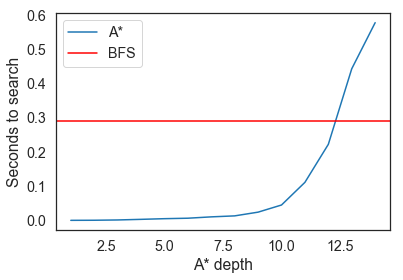

In [9]:
plt.plot(ds, a_star_times, label='A*')
plt.axhline(bfs_time, c='r', label='BFS')
plt.legend()
plt.xlabel('A* depth')
plt.ylabel('Seconds to search');